Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, завдання буде оцінена максимум у половину балів.

Під час виконання вам дозволено користуватися будь-якими зручними для вас Python бібліотеками для візуалізації.

# I. Receiving Data.

In [1]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

1. (2б) Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою titanic ([train.csv](https://www.kaggle.com/c/titanic/data?select=train.csv)). Зчитайте його та збережіть його у змінну, щоб у подальшому її використати для візуалізацій. Виведіть інформацію про кожну колонку, її індекс, тип та кількість непропущених значень та перші кілька рядків датафрейму.


In [3]:
train_df = pd.read_csv('./data/train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# IІ. Data Visualization.

2. (10б) Створіть pie chart, який би показував співвідношення виживших до загиблих.

Survived
False    549
True     342
Name: count, dtype: int64


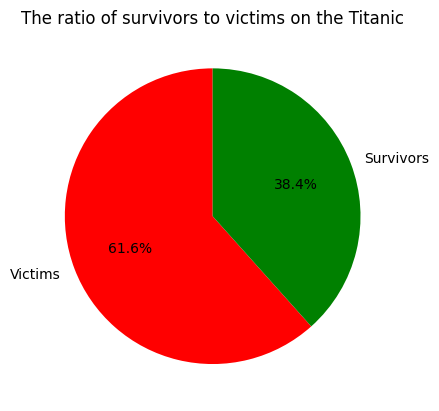

In [5]:
train_df['Survived'] = train_df['Survived'].astype('bool')
survived_count = train_df['Survived'].value_counts()
print(survived_count)

plt.pie(survived_count, labels=['Victims', 'Survivors'], autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('The ratio of survivors to victims on the Titanic')
plt.show()

The data shows that out of the total number of passengers in the Titanic dataset, 342 survived, while 549 died. 
This value  shows the ratio between the number of people who survived and those who died during the tragedy (2/3). 
Almost two in five only survived.

3. (20б) Створіть bar chart, який би показував співвідношення загиблих до виживших для кожної статі. Для groupby використовуйте атрибут as_index=False.


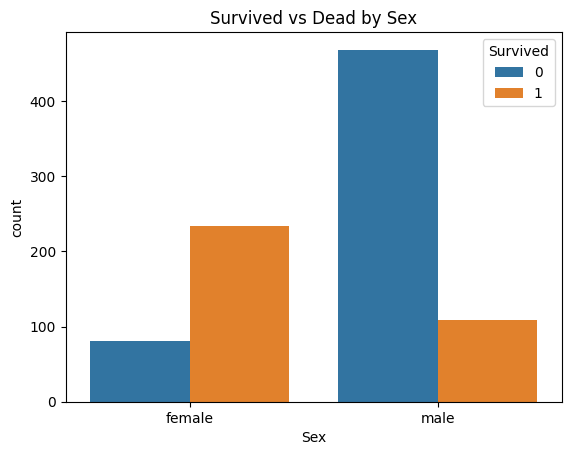

      Sex  Survived  size
0  female     False    81
1  female      True   233
2    male     False   468
3    male      True   109


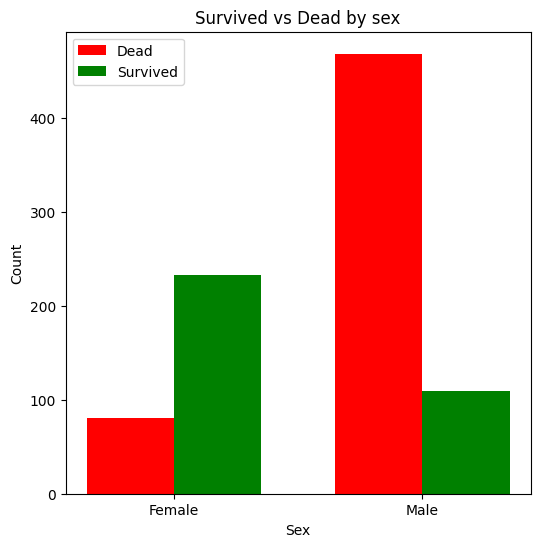

In [6]:
survived_by_sex = train_df.groupby(['Sex', 'Survived'], as_index=False).size()

labels = ['Female', 'Male']
x = np.arange(len(labels))

print(survived_by_sex)

width = 0.35

fig, ax = plt.subplots(figsize=(6, 6))
ax.bar(x - width / 2, survived_by_sex[survived_by_sex['Survived'] == False]['size'].tolist(), width, label='Dead',
       color='red')
ax.bar(x + width / 2, survived_by_sex[survived_by_sex['Survived'] == True]['size'].tolist(), width, label='Survived',
       color='green')

ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Survived vs Dead by sex')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

These data indicate that there were significantly more survivors among women than among men. 
At the same time, very few men survived compared to those who died. 
This distribution may reflect priorities during the evacuation, where saving women may have been prioritized over saving men.

4. (20б) Відобразіть кількість пропущених значень в датасеті по кожній із змінних.

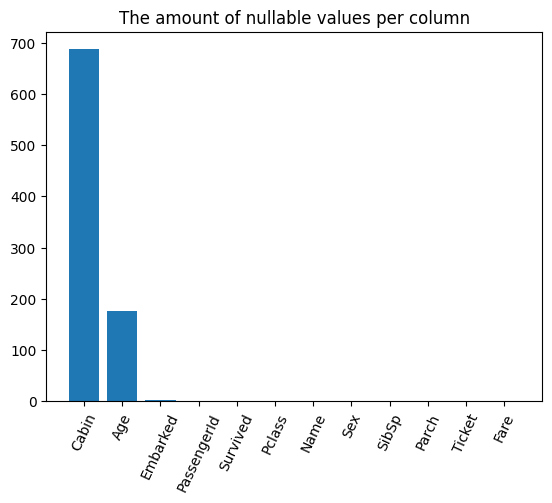

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


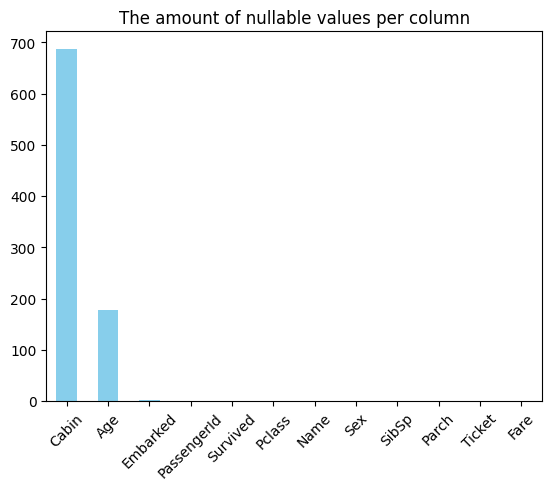

In [7]:
missing_values = train_df.isnull().sum().sort_values(ascending=False)

print(missing_values)

missing_values.plot(kind='bar', color='skyblue')
plt.title('The amount of nullable values per column')
plt.xticks(rotation=45)
plt.show()

Some of the values from Cabin may be missing because the cabin marked only for passengers who buy tickets. It missed about 80% values, so I would prefer to not use this variable.
Age may be missed for passengers that worked their. 
Embarked is nullable because of passengers that missed tour.

5. (10б) Побудуйте наступний графік, дайте йому назву та опишіть, що власне на них відображається.

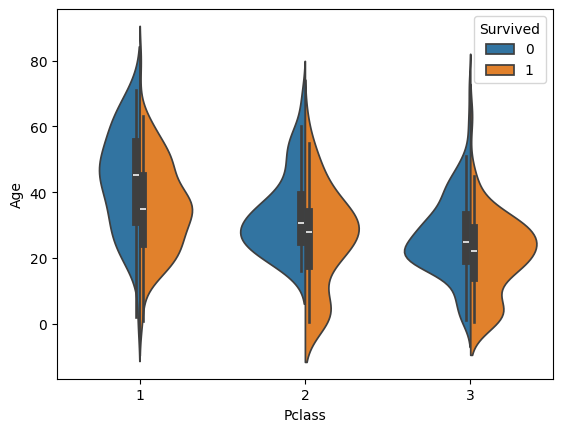

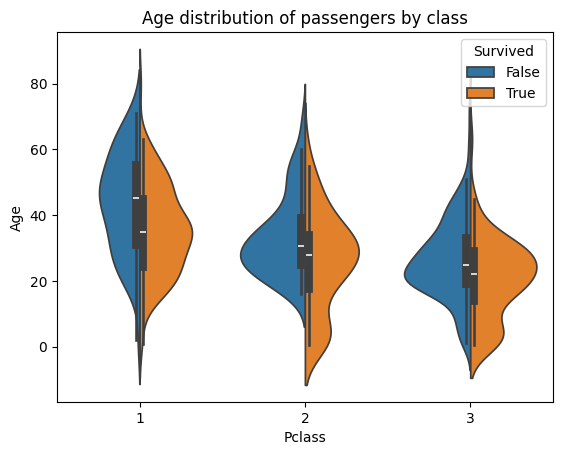

In [8]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_df, split=True)

plt.title('Age distribution of passengers by class')
plt.legend(title='Survived', loc='upper right')

plt.show()

- First-class passengers generally had a wider age range compared to passengers in lower classes.
- The age distribution among second-class passengers was more evenly distributed across different age groups compared to first-class passengers.
- Third-class passengers had a more skewed age distribution, with a higher proportion of younger individuals and children.
- Families seeking more affordable accommodations likely populated the third class, leading to a higher presence of children and younger adults.
- In all classes we have trend where more young people from classes have bigger chances to survive.

6. (13б) Побудуйте графік розподілу частот по віку пасажирів.


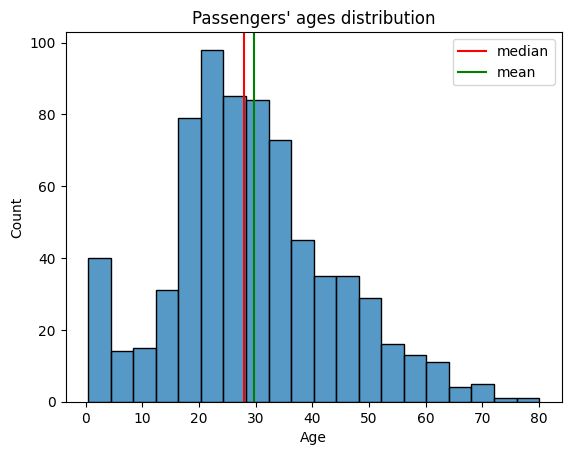

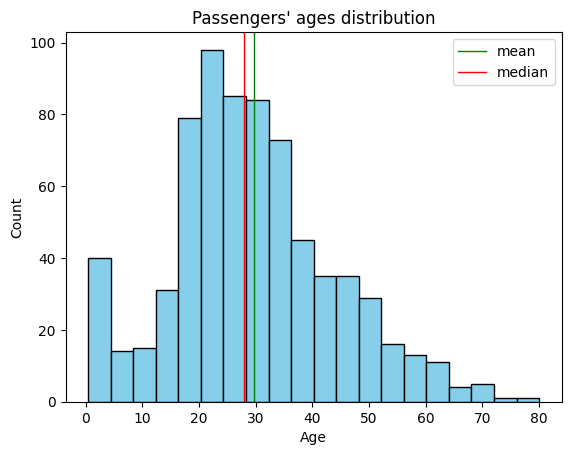

In [9]:
age_data = train_df['Age'].dropna()

plt.hist(age_data, bins=20, color='skyblue', edgecolor='black')
plt.axvline(age_data.mean(), color='green', linewidth=1, label='mean')
plt.axvline(age_data.median(), color='red', linewidth=1, label='median')

plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Passengers\' ages distribution')

plt.show()

- One peak corresponds to children and adolescents, indicating a significant presence of families traveling with young members.
- The second peak represents adults in their late twenties to early forties, suggesting a substantial portion of independent travelers and working-age individuals.
- There is a notable difference of elderly passengers (those above 65 years) in the distribution.

7. (25б) Поставте бізнес-питання до даних. Дайте на нього відповідь за допомогою візуалізацій. Прокоментуйте отриману відповідь.

- Survival rate based on passengers with parents or child onboard?
- Survival rate based on passengers with sibling or spouse onboard?

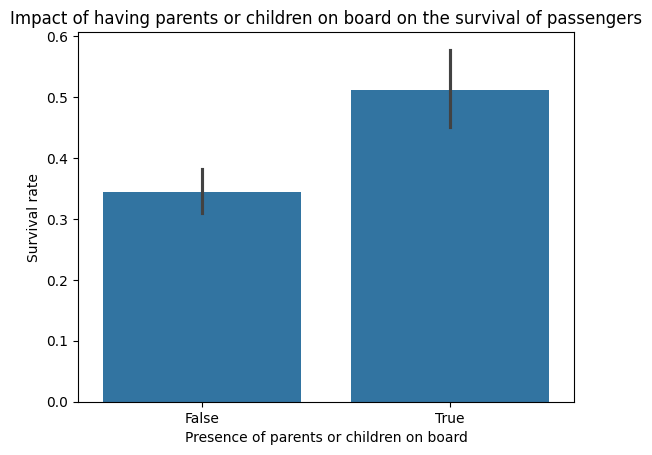

In [10]:
train_df['with_parch'] = (train_df['Parch'] > 0)

sns.barplot(x='with_parch', y='Survived', data=train_df)
plt.xlabel('Presence of parents or children on board')
plt.ylabel('Survival rate')
plt.title('Impact of having parents or children on board on the survival of passengers')
plt.show()

The visualization shows that passengers who had parents or children on board had a higher percentage of survivors compared to those traveling without them. 
This may indicate that passengers with close relatives had a higher chance of survival, likely due to support and cooperation during the evacuation.

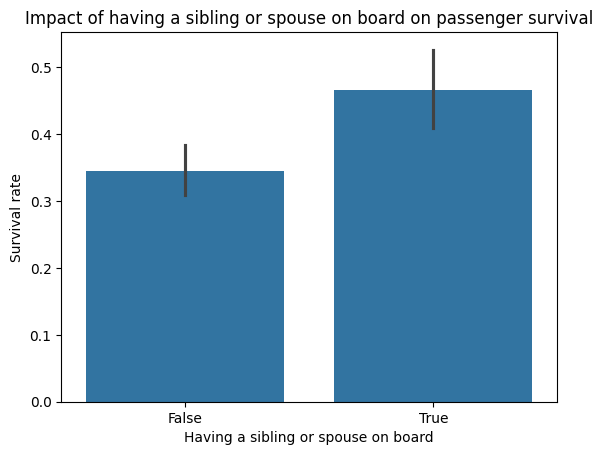

In [11]:
train_df['with_sib_spouse'] = (train_df['SibSp'] > 0)

sns.barplot(x='with_sib_spouse', y='Survived', data=train_df)
plt.xlabel('Having a sibling or spouse on board')
plt.ylabel('Survival rate')
plt.title('Impact of having a sibling or spouse on board on passenger survival')
plt.show()

The visualization shows that passengers who had a sibling or spouse on board had a higher percentage of survivors compared to those traveling without them.
This may indicate that passengers with a sibling or spouse were more likely to survive, likely as previous one.

# Вітаю! Ви велика(ий) молодець, що впоралась(вся). Похваліть себе та побалуйте чимось приємним. Я Вами пишаюся.

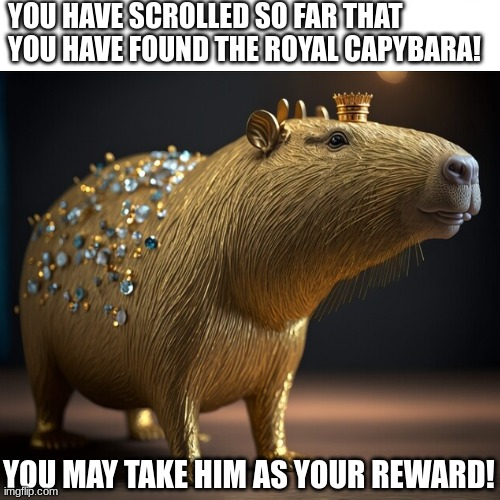